# Data

## Image

* Lấy data từ video của hệ thống giám sát
* Camera đặt trên mực nước biển ~ 30m (~140m)
* Ảnh xiên, RGB, sizes: 1280x960 (2452x2056)
* **0.5m/pixel**

* Ảnh được chụp với tần số **2Hz (0.5s/ảnh)** và sampling trong **10m**

## Label

* **3 chuyên gia độc lập** đánh dấu các điểm theo shoreline
* Mặc dù đều tuân theo tiêu chí chung nhưng vẫn khác biệt nhau

* Dùng **interpolating** với **splines bậc 3** để tạo đường cong cho shoreline:  

$$ \text{Cho các điểm: }  (x_0, y_0), (x_1, y_1), ..., (x_n, y_n), \text{spline bậc 3 là tập hợp các đa thức bậc 3: } S_i(x) \text{ được xác định trên mỗi khoảng} [x_i,x_{i+1}]$$  

$$ S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3 $$

trong đó $a_i, b_i, c_i, d_i$ được xác định sao cho **spline là hàm liên tục**, có **đạo hàm bậc nhất và bậc 2 liên tục** trên toàn bộ miền

* 3 đường cong từ 3 experts đã nội suy sẽ được **average** thành 1 đường duy nhất cho 1 ảnh

* Tập hợp các $s^{(q)}$ là tọa độ của shoreline:

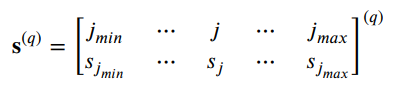

trong đó:
* $j_{min} \rightarrow j_{max}$ là tọa độ theo trục ngang (x-coordinate) của đường bờ
* $s_{j_{min}} \rightarrow s_{j_{max}}$ là tọa độ theo trục dọc (y-coordinate) của đường bờ

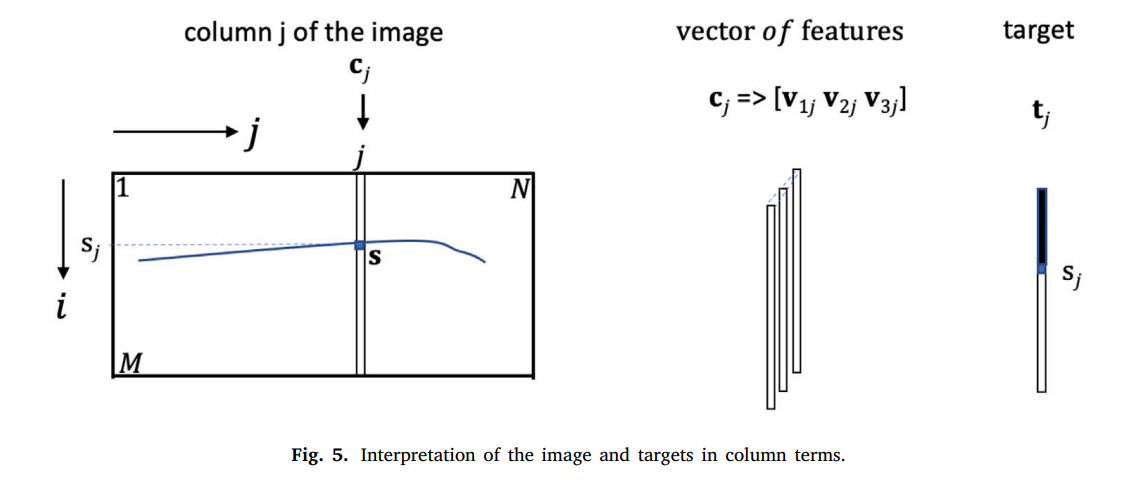

# Model

## LSTM

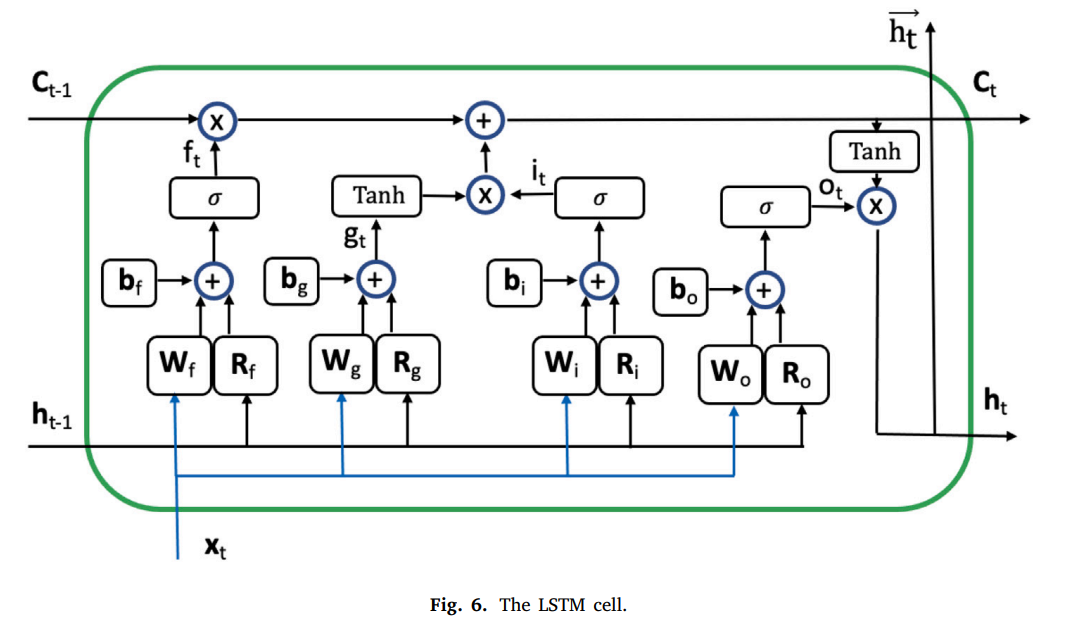

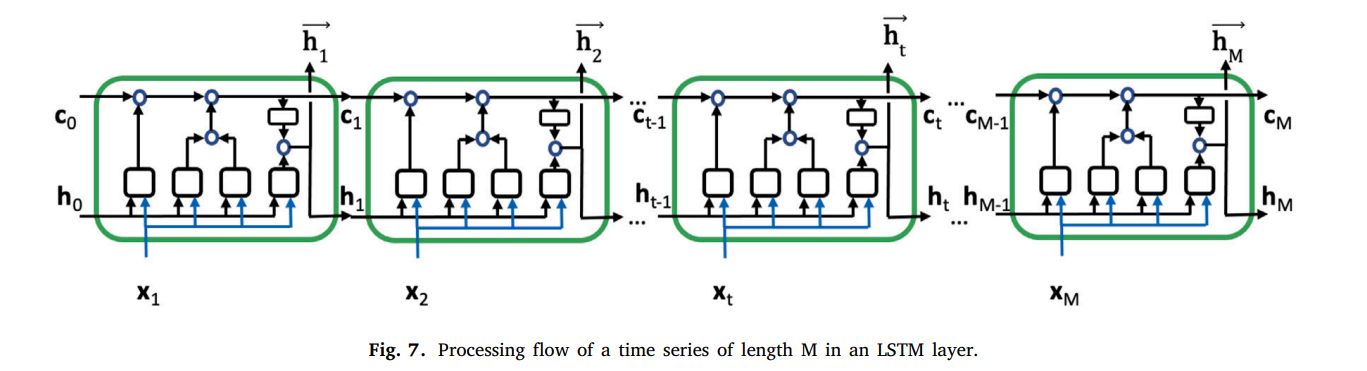

## Bi-LSTM

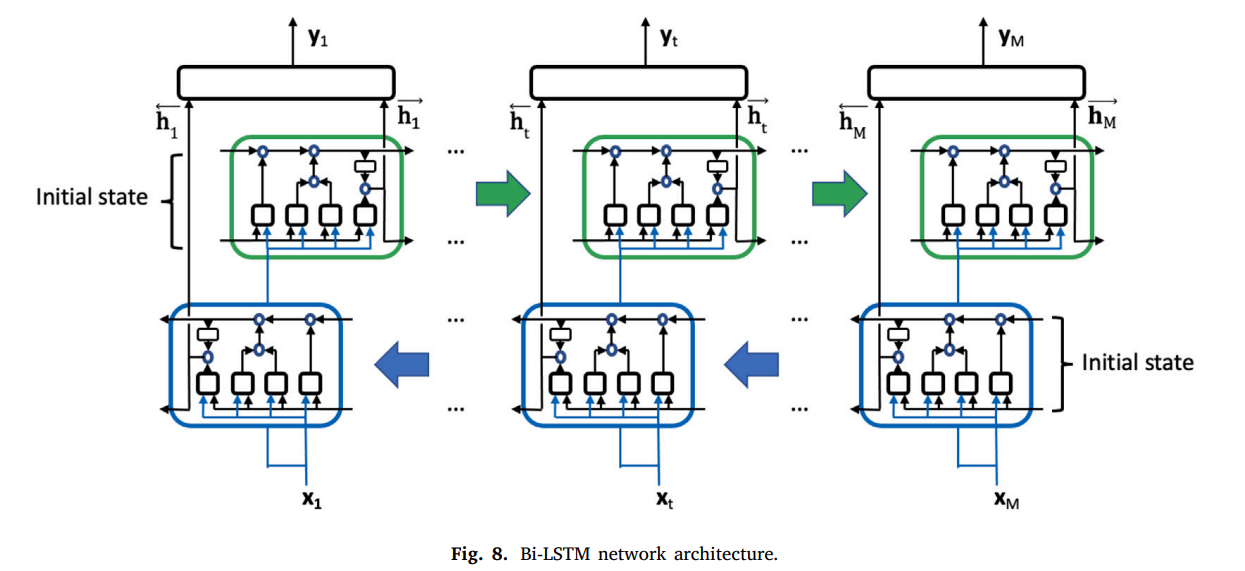

trong đó:  
$$ y_t = \sigma(W_{\vec{h}y}\vec{h}_t + W_{\overleftarrow{h}y}\overleftarrow{h}_t + b_y)$$

## Workflow

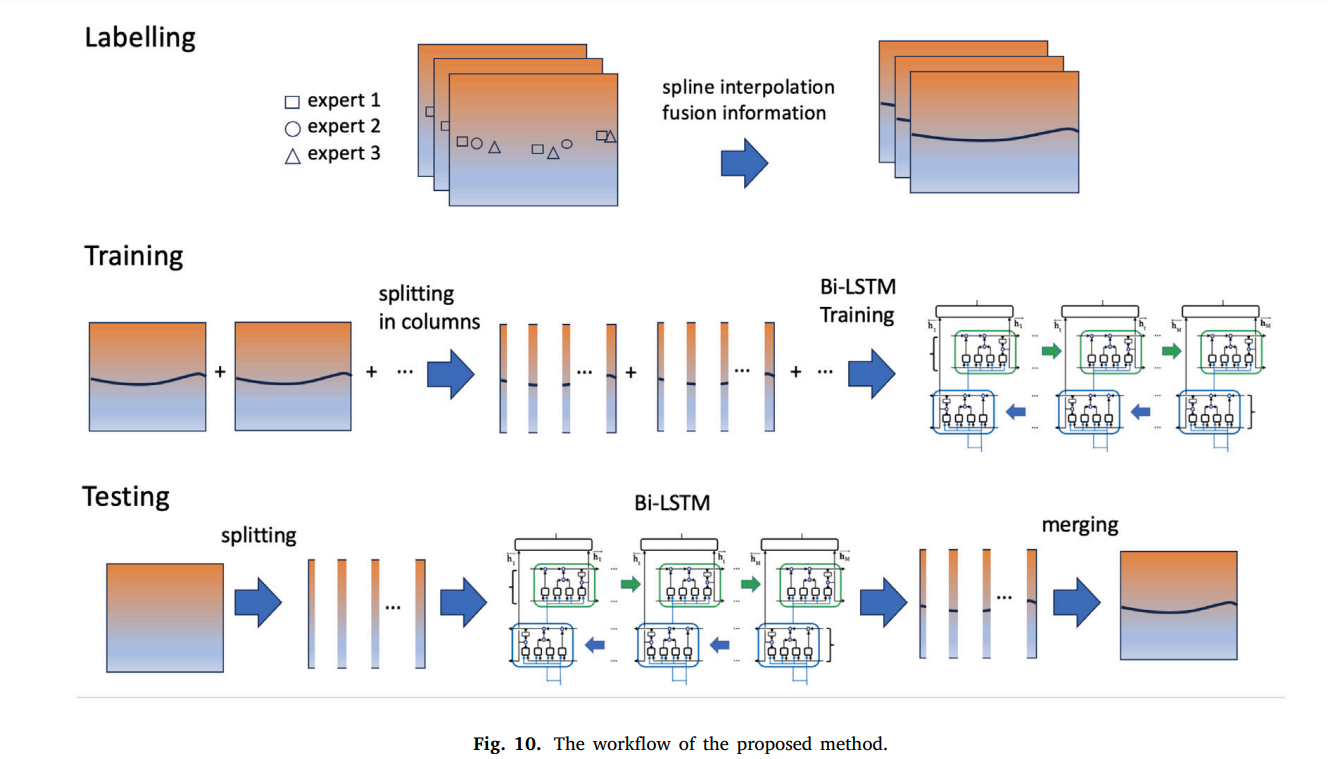

# Results

## Environment

* MacBook Pro with 2,4 GHz Intel Core i9 of 8 cores with 64 GB 2667 MHz, AMD Radeon Pro 5500M 8 GB Intel UHD Graphics 630 1536MB (?)
* optimizer: **Adam**
* miniBatchSize: 80
* GradientThreshold: 1

## Experiments

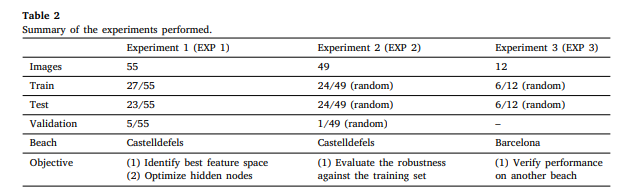

### Exp 1: Optimal architecture

Determines the best **feature space** and the **optimal size** of bi-LSTM

* The **numbers of hidden node** explored: **[30, 45, 60, 75]**
* For each value of hidden nodes, train 2 models: one with **RGB feature space**, other is **CIELAB**

> ⚠️ **major errors** occur in parts of image are **burnt due to the sun's exposition**

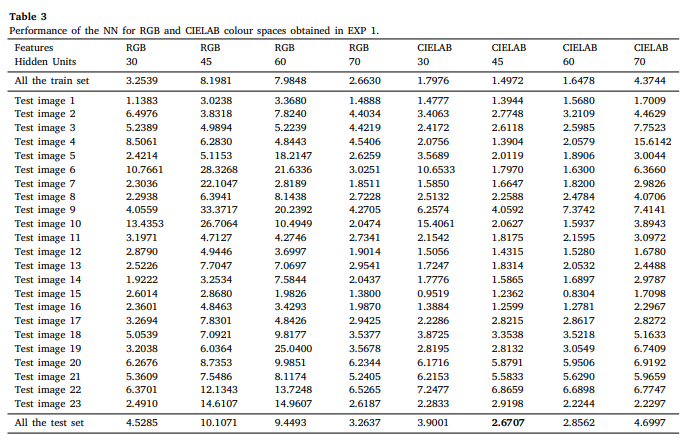

>✅ **CIELAB** is better with range of hidden nodes: from **45 to 60 (best at 45)**

### Exp 2: Images for training

*Using bi-LSTM 45 hidden nodes with CIELAB feature space*

**10 difference times (permutation)** divide 49 images into:
* train: 24 (random)
* validation: 1 (random)
* test: 24 (random)

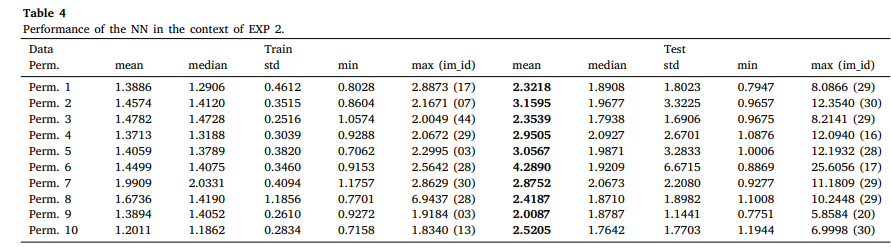

> ✅ 9/10 perm có trung bình sai số trong khoảng **2-3px** tức là khoảng **1-1.5m** 

### Exp 3: Train,Test on difference beach

**10 difference times (permutation)** divide 12 images (from Barcelona) into:
* train: 6 (random)
* test: 6 (random)

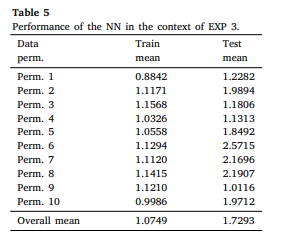

> ✅ Sai số khoảng 0.54m (train) và 0.86m (test)